In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay)


In [2]:
# 1. Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels
feature_names = iris.feature_names
target_names = iris.target_names

In [3]:
# 2. Explore the dataset
print("Feature names:", feature_names)
print("Target names:", target_names)
print("\nFirst 5 samples:\n", X[:5])
print("\nCorresponding labels:", y[:5])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 5 samples:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Corresponding labels: [0 0 0 0 0]


In [4]:
# 3. Preprocess the data
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# 4. Create and train the KNN model
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
# 5. Make predictions
y_pred = knn.predict(X_test)


In [7]:
# 6. Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")



Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45


Accuracy: 0.91


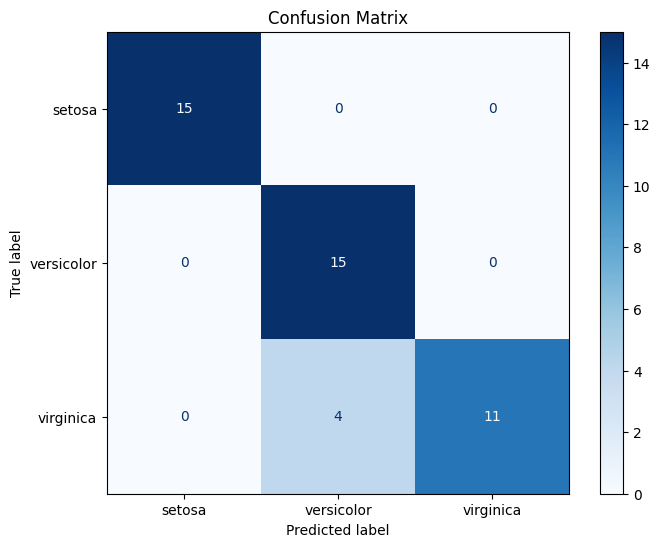

In [8]:
# 7. Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test,display_labels=target_names,cmap=plt.cm.Blues,ax=ax)
plt.title("Confusion Matrix")
plt.show()

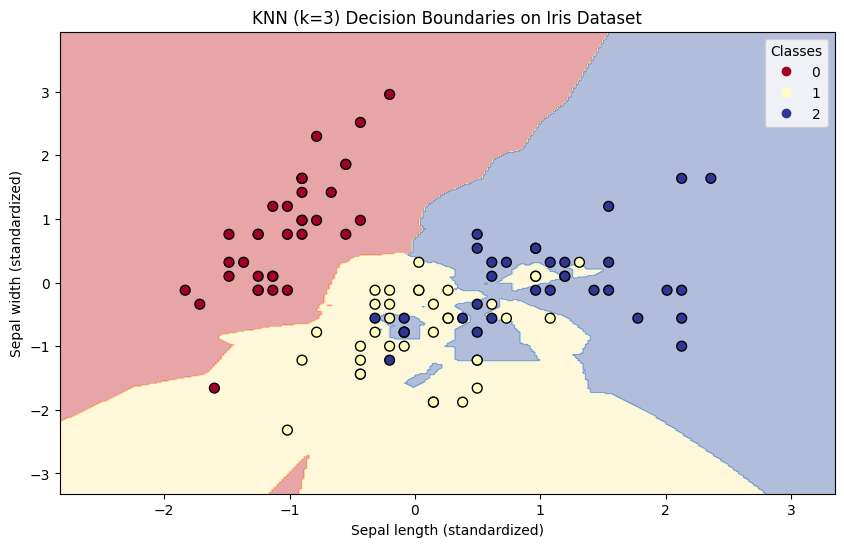

In [9]:
# 8. Visualize decision boundaries (using only 2 features for plotting)
# We'll use sepal length and sepal width
X_2d = X[:, :2]  # First two features
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the 2D data
scaler_2d = StandardScaler()
X_train_2d = scaler_2d.fit_transform(X_train_2d)
X_test_2d = scaler_2d.transform(X_test_2d)

# Train a new KNN model on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=k)
knn_2d.fit(X_train_2d, y_train_2d)

# Create a mesh grid for plotting
h = 0.02  # step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for each point in mesh grid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

# Plot training points
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_2d,
                      s=50, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.title(f'KNN (k={k}) Decision Boundaries on Iris Dataset')

# Add legend
legend = plt.legend(*scatter.legend_elements(),
                    title="Classes", loc="upper right")
plt.setp(legend.get_texts(), color='black')
plt.show()